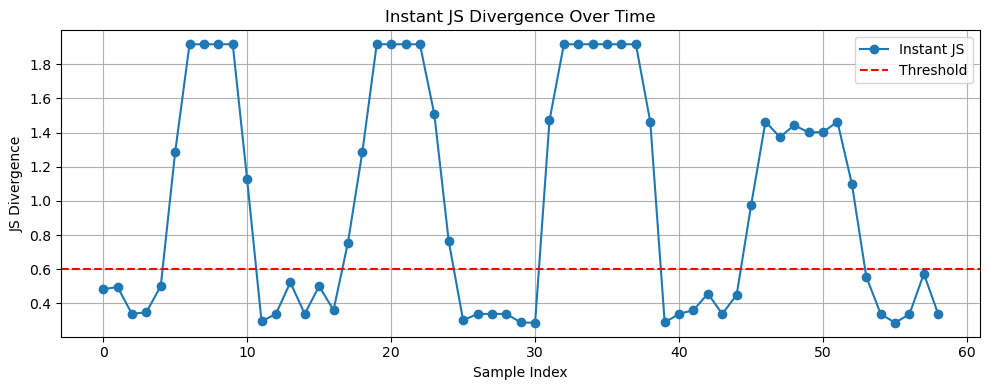

In [82]:
import json
import matplotlib.pyplot as plt

with open("js_plot.json") as f:
    js_data = json.load(f)

plt.figure(figsize=(10, 4))
plt.plot(js_data, marker='o', label='Instant JS')
plt.axhline(y=0.6, color='r', linestyle='--', label='Threshold')
plt.xlabel("Sample Index")
plt.ylabel("JS Divergence")
plt.title("Instant JS Divergence Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("js_plot.png", dpi=300)  # 可用于论文插图
plt.show()

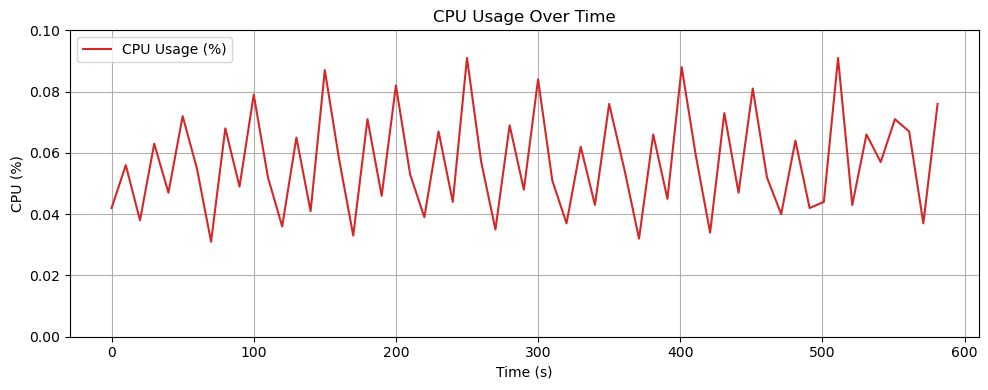

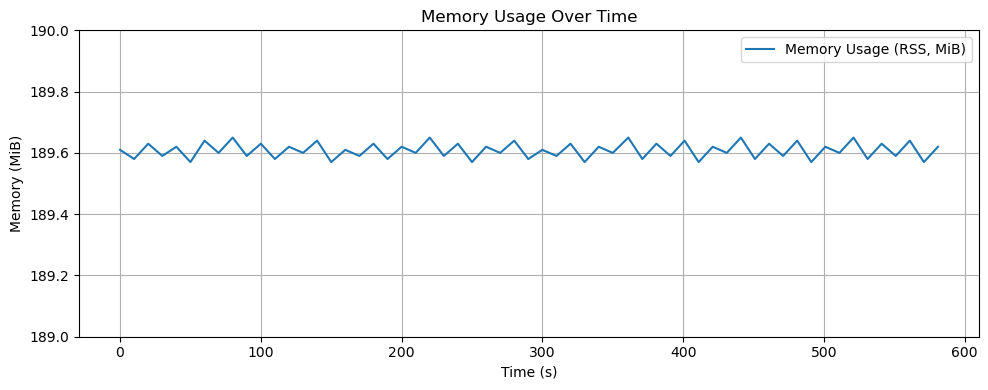

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
def smooth(series, window_size=5):
    return series.rolling(window=window_size, center=True, min_periods=1).mean()

# 读取 CSV 文件
df = pd.read_csv("resource_usage.csv")

# 将时间戳转换为相对时间（秒）
start_time = df["timestamp"].iloc[0]
df["time_sec"] = df["timestamp"] - start_time

# 绘制 CPU 使用率
plt.figure(figsize=(10, 4))
plt.plot(df["time_sec"], df["cpu_percent"], label="CPU Usage (%)", color="tab:red")
plt.xlabel("Time (s)")
plt.ylabel("CPU (%)")
plt.title("CPU Usage Over Time")
plt.grid(True)
plt.ylim(0, 0.1)
plt.legend()
plt.tight_layout()
plt.savefig("cpu_usage_plot.png")
plt.show()

# 绘制内存使用（RSS，单位：MiB）
plt.figure(figsize=(10, 4))
plt.plot(df["time_sec"], df["rss_mib"], label="Memory Usage (RSS, MiB)", color="tab:blue")
plt.xlabel("Time (s)")
plt.ylabel("Memory (MiB)")
plt.title("Memory Usage Over Time")
plt.grid(True)
plt.ylim(189, 190)
plt.legend()
plt.tight_layout()
plt.savefig("memory_usage_plot.png")
plt.show()


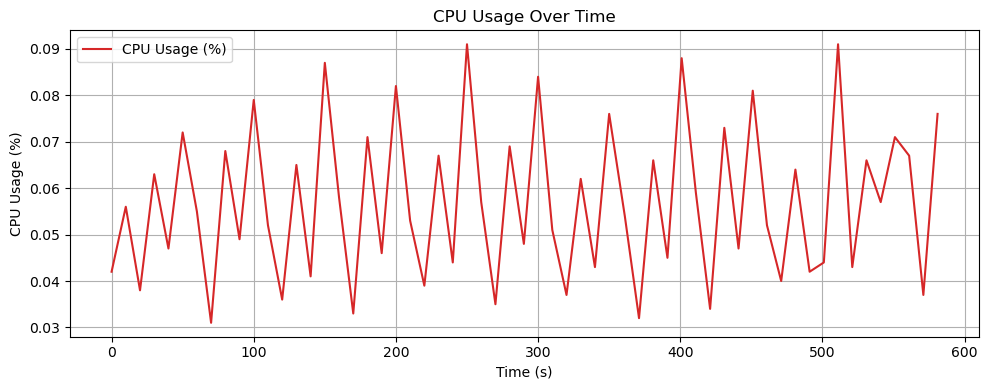

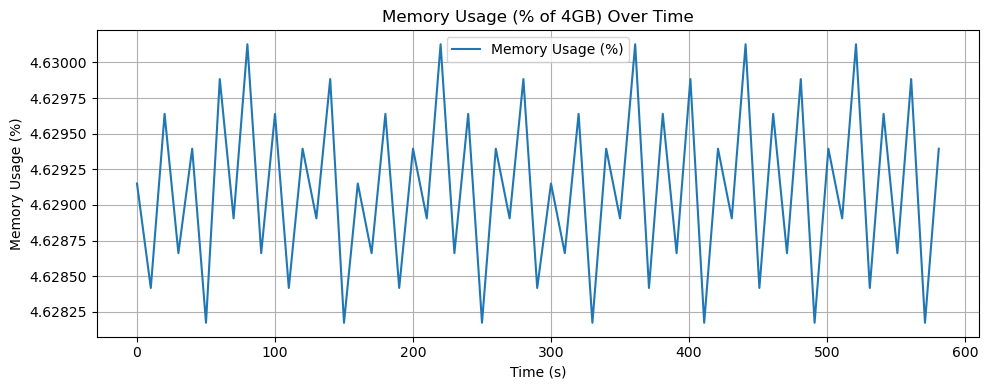

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设总内存为 4096 MiB
TOTAL_MEM_MIB = 4096

# 读取 CSV 文件
df = pd.read_csv("resource_usage.csv")

# 时间转换为相对秒数
start_time = df["timestamp"].iloc[0]
df["time_sec"] = df["timestamp"] - start_time

# 如果是以 KB 为单位的 RSS，先换算成 MiB
if "rss_kb" in df.columns:
    df["rss_mib"] = df["rss_kb"] / 1024
elif "rss_mib" not in df.columns:
    raise ValueError("CSV 文件中必须包含 rss_kb 或 rss_mib 列")

# 计算内存使用占比 %
df["mem_percent"] = (df["rss_mib"] / TOTAL_MEM_MIB) * 100

# 绘图：CPU 使用率
plt.figure(figsize=(10, 4))
plt.plot(df["time_sec"], df["cpu_percent"], label="CPU Usage (%)", color="tab:red")
plt.xlabel("Time (s)")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("cpu_usage_plot.png")
plt.show()

# 绘图：内存使用百分比
plt.figure(figsize=(10, 4))
plt.plot(df["time_sec"], df["mem_percent"], label="Memory Usage (%)", color="tab:blue")
plt.xlabel("Time (s)")
plt.ylabel("Memory Usage (%)")
plt.title("Memory Usage (% of 4GB) Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("memory_usage_percent_plot.png")
plt.show()


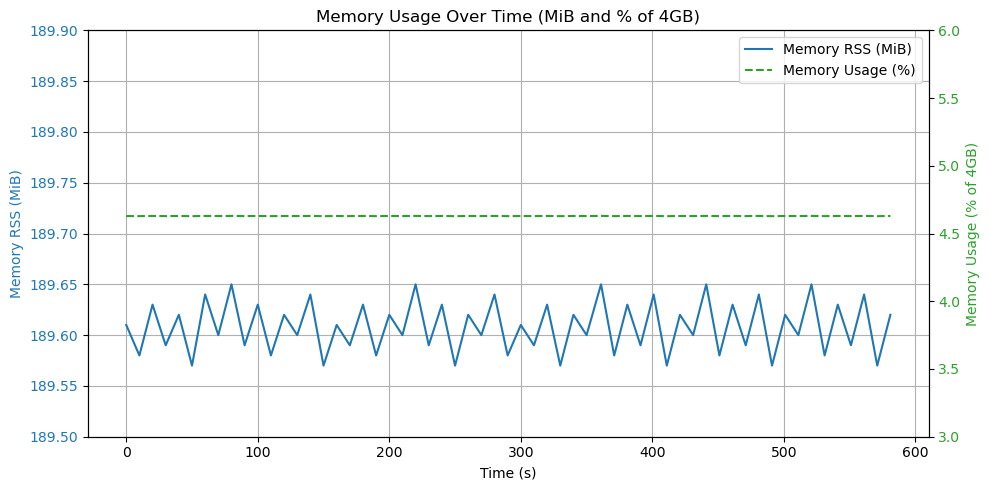

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# 读CSV
df = pd.read_csv("resource_usage.csv")

# 时间转换成相对秒
start_time = df["timestamp"].iloc[0]
df["time_sec"] = df["timestamp"] - start_time

# 总内存4GB，单位MiB
total_mem_mib = 4 * 1024

# 处理内存单位，假设csv有rss_kb字段
if "rss_kb" in df.columns:
    df["rss_mib"] = df["rss_kb"] / 1024
elif "rss_mib" not in df.columns:
    raise ValueError("CSV中缺少rss_kb或rss_mib字段")

# 计算内存占比
df["rss_percent_of_total"] = df["rss_mib"] / total_mem_mib * 100

# 画图
fig, ax1 = plt.subplots(figsize=(10, 5))

color_mem = "tab:blue"
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Memory RSS (MiB)", color=color_mem)
line1, = ax1.plot(df["time_sec"], df["rss_mib"], color=color_mem, label="Memory RSS (MiB)")
ax1.tick_params(axis='y', labelcolor=color_mem)
ax1.set_ylim(189.5, 189.9)
ax1.grid(True)

ax2 = ax1.twinx()
color_percent = "tab:green"
ax2.set_ylabel("Memory Usage (% of 4GB)", color=color_percent)
line2, = ax2.plot(df["time_sec"], df["rss_percent_of_total"], color=color_percent, linestyle='--', label="Memory Usage (%)")
ax2.tick_params(axis='y', labelcolor=color_percent)
ax2.set_ylim(3, 6)

# 图例
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc="upper right")

plt.title("Memory Usage Over Time (MiB and % of 4GB)")
plt.tight_layout()
plt.savefig("memory_dual_axis_plot.png")
plt.show()
